In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata,study_results)

# Display the data table for preview

combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
# Checking the number of mice.

number_mice_unique_df = combined_data["Mouse ID"].count()
number_mice_unique_df

1893

In [18]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_rows = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_by_ID_df = combined_data.drop_duplicates("Mouse ID")
clean_by_ID_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [20]:
# Checking the number of mice in the clean DataFrame.

number_mice_clean = clean_df["Mouse ID"].count()
number_mice_clean

249

In [26]:
# Dataframe of Mice without duplicate timepoints to be used for the rest of the steps

clean_df = combined_data.drop_duplicates(["Mouse ID","Timepoint"])
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM": SEM})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<AxesSubplot:title={'center':'Drug Regimen Count'}, xlabel='Drug Regimen'>

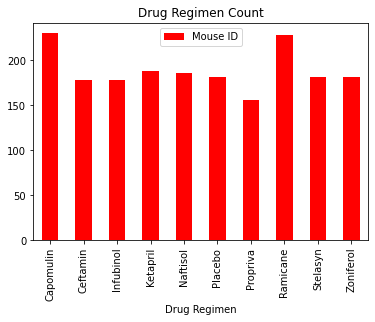

In [90]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_data = pd.DataFrame(clean_df.groupby(["Drug Regimen"]).count()).reset_index()
drug_count = drug_data[["Drug Regimen", "Mouse ID"]].set_index("Drug Regimen")
drug_count.plot(kind="bar", title = "Drug Regimen Count", color="red")


Text(0.5, 1.0, 'Drug Regimen Count')

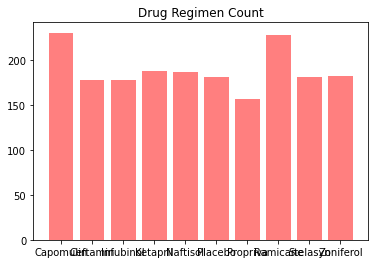

In [103]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

count = clean_df.groupby(["Drug Regimen"])["Age_months"].count()
drugs = summary_df.index

x_axis = np.arange(len(drugs))
plt.bar(drugs, count, color='r', alpha=0.5, align="center")
plt.title("Drug Regimen Count")



<AxesSubplot:title={'center':'Drug Regimen Count'}, ylabel='Mouse ID'>

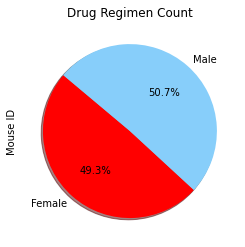

In [139]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_data = pd.DataFrame(clean_df.groupby(["Sex"]).count()).reset_index()
gender_count = gender_data[["Sex", "Mouse ID"]].set_index("Sex")
gender_count
colors = ["red","lightskyblue"]
gender_count.plot(kind="pie",y = "Mouse ID", title="Drug Regimen Count", colors=colors, autopct='%1.1f%%',
              startangle=140, shadow=True, labels=gender_data["Sex"], legend = False,)

([<matplotlib.patches.Wedge at 0x7fba71411a30>,
 [Text(-0.7925485910066417, -0.9010364758950591, 'Males'),
  Text(0.726502952420448, 0.8259500348836922, 'Females')],
 [Text(-0.46232001142054097, -0.5256046109387844, '49.3%'),
  Text(0.3962743376838807, 0.4505182008456502, '50.7%')])

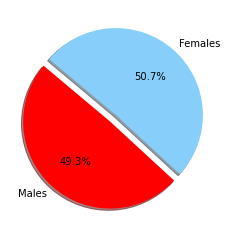

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = clean_df.groupby(["Sex"])["Mouse ID"].count()

labels = ["Males", "Females"]
colors = ["red","lightskyblue"]
explode = (0.1, 0)

plt.pie(gender, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=140)

In [146]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_volume = pd.merge(max_timepoint,clean_df)
final_volume


,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,k403,Ramicane,Male,21,16,22.050126,1
1,45,s185,Capomulin,Female,3,17,23.343598,1
2,45,x401,Capomulin,Female,16,15,28.484033,0
3,45,m601,Capomulin,Male,22,17,28.430964,1
4,45,g791,Ramicane,Male,11,16,29.128472,1
...,...,...,...,...,...,...,...,...
40251,20,y769,Ceftamin,Female,6,27,55.025724,2
40252,20,y865,Ceftamin,Male,23,26,52.361982,1
40253,20,z581,Infubinol,Female,24,25,51.807944,2
40254,20,z795,Naftisol,Female,13,29,53.280657,1


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
 treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds